In [129]:
# B171210061 0=apple 21=chimpanzee 49=mountain 64=possum 84=table

import matplotlib.pyplot as plt
import numpy as np
import random
import pydot
from keras.datasets import cifar100
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D,Activation, Dropout, MaxPool2D
from keras import optimizers

(x_train, y_train), (x_test, y_test) = cifar100.load_data() # load dataset

classes = [0, 21, 49, 64, 84]

In [130]:
def getIndex(arr):
    for i in range(len(arr)):
        if arr[i] == 1:
            return i

def getClassName(num):
    if num == 0:
        return 'apple'
    elif num == 1:
        return 'chimpanzee'
    elif num == 2:
        return 'mountain'
    elif num == 3:
        return 'possum'
    else:
        return 'table'

In [131]:
X_train = []
Y_train = []
X_test = []
Y_test = []


for i in range(10000):
    isInArray = False
    for n in range(0, len(classes)):
        if(classes[n] == int(y_test[i])):
            isInArray = True
    if(isInArray):
        X_test.append(x_test[i])
        
        category = 0
        if(y_test[i]==21):
            category = 1
        elif(y_test[i]==49):
            category = 2
        elif(y_test[i]==64):
            category = 3
        elif(y_test[i]==84):
            category = 4
        
        Y_test.append(category)

for i in range(50000):
    isInArray = False
    for n in range(0, len(classes)):
        if(classes[n] == int(y_train[i])):
            isInArray = True
    if(isInArray):
        X_train.append(x_train[i])
        
        category = 0
        if(y_train[i]==21):
            category = 1
        elif(y_train[i]==49):
            category = 2
        elif(y_train[i]==64):
            category = 3
        elif(y_train[i]==84):
            category = 4
        
        Y_train.append(category)

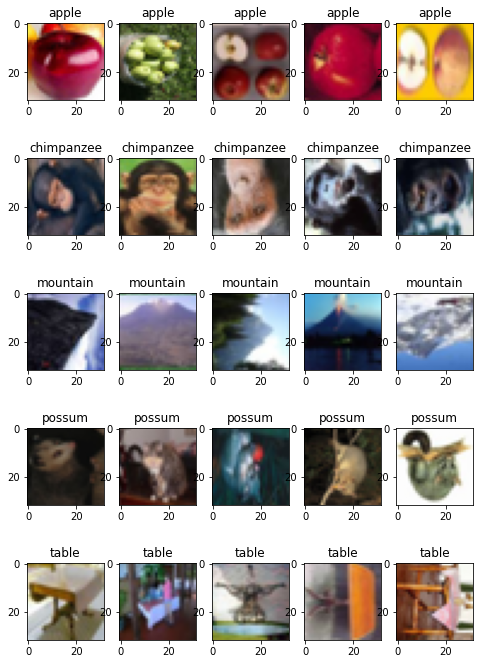

In [132]:
for i in range(len(X_train)):
    X_train.append(np.rot90(X_train[i]))
    Y_train.append(Y_train[i])
    X_train.append(np.rot90(X_train[i], 2))
    Y_train.append(Y_train[i])
    X_train.append(np.rot90(X_train[i], 3))
    Y_train.append(Y_train[i])

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

Y_train=to_categorical(Y_train,5)
Y_test=to_categorical(Y_test,5)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 12))
for i in range(5):
    for n in range(5):
        isEqual = False
        while isEqual == False:
            randomNumber = random.randint(0,len(X_train)- 1)
            if getIndex(Y_train[randomNumber]) == i:
                axes[i][n].set_title(getClassName(getIndex(Y_train[randomNumber])))
                axes[i][n].imshow(X_train[randomNumber])
                isEqual = True
            else:
                randomNumber = random.randint(0,len(X_train)-1)

In [133]:
def createModel():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape= (32, 32, 3)))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPool2D())
    model.add(Dropout(0.2))
    model.add(Conv2D(230,(3,3),padding='same',activation='relu'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5,activation='softmax'))
    model.summary()
 
    from keras import optimizers
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

    return model

model1 = createModel()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 8, 8, 128)       

In [134]:
history=model1.fit(X_train,
                  Y_train,
                  epochs=20,
                  steps_per_epoch=500,
                  validation_data=(X_test,Y_test))

Epoch 1/20
500/500 [==============================] - 53s 106ms/step - loss: 1.0643 - acc: 0.5701 - val_loss: 0.9014 - val_acc: 0.6720
Epoch 2/20
500/500 [==============================] - 56s 111ms/step - loss: 0.8130 - acc: 0.6834 - val_loss: 0.8012 - val_acc: 0.7080
Epoch 3/20
500/500 [==============================] - 53s 106ms/step - loss: 0.7257 - acc: 0.7194 - val_loss: 0.7108 - val_acc: 0.7580
Epoch 4/20
500/500 [==============================] - 52s 104ms/step - loss: 0.6481 - acc: 0.7499 - val_loss: 0.6087 - val_acc: 0.7800
Epoch 5/20
500/500 [==============================] - 52s 103ms/step - loss: 0.5813 - acc: 0.7779 - val_loss: 0.5753 - val_acc: 0.8020
Epoch 6/20
500/500 [==============================] - 50s 100ms/step - loss: 0.5305 - acc: 0.7993 - val_loss: 0.5554 - val_acc: 0.8220
Epoch 7/20
500/500 [==============================] - 49s 98ms/step - loss: 0.4925 - acc: 0.8118 - val_loss: 0.4868 - val_acc: 0.8360
Epoch 8/20
500/500 [==============================] - 49

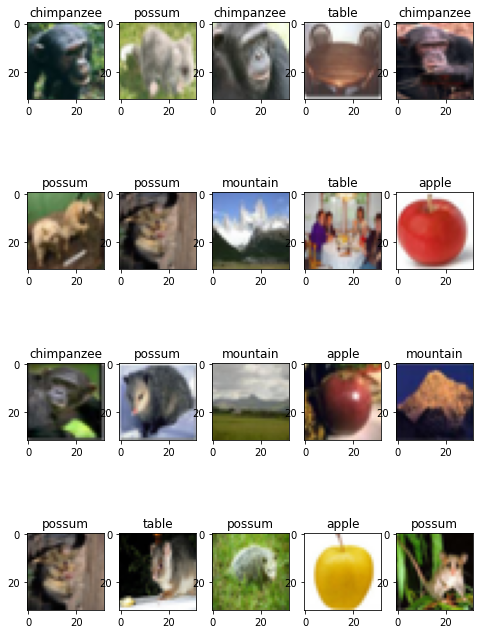

In [135]:
prediction = []
actual = []
fig,axes = plt.subplots(nrows = 4, ncols = 5, figsize=(8, 12))
rowNum = 0

for i in range(20):
    if(i%5 ==0 and i != 0):
        rowNum = rowNum + 1
    randomNumber = random.randint(0,len(X_test)-1)
    img = X_test[randomNumber]
    axes[rowNum, i % 5].imshow(img)
    img = img.reshape(1, 32, 32, 3)
    classIndex = model1.predict_classes(img)
    prediction.append(classIndex[0])
    actual.append(getIndex(Y_train[randomNumber]))
    axes[rowNum, i%5].set_title(getClassName(classIndex[0]))

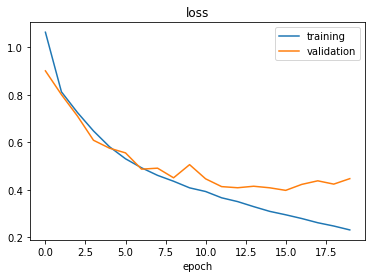

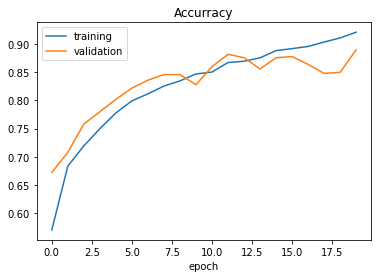

Test Score: 0.4467128813266754
Test Accuracy: 0.8899999856948853


In [136]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accurracy')
plt.xlabel('epoch')
plt.show()
score =model1.evaluate(X_test,Y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [137]:
confusion_matrix(actual, prediction)

array([[0, 2, 1, 1, 0],
       [1, 0, 0, 4, 0],
       [0, 1, 1, 2, 1],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 2]], dtype=int64)

In [138]:
import tensorflow as tf
tf.keras.utils.plot_model(model1, to_file='model.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
